In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [65]:
"""
SELECT TOP 500 de,plx,ra,vmag FROM public.hipparcos  WHERE CONTAINS(POINT('ICRS',public.hipparcos.ra,public.hipparcos.de),BOX('ICRS',82.5,0,15,24))=1    AND  (vmag<7)
"""
"de,plx,ra,vmag"
const = np.loadtxt("result.csv",delimiter=",",skiprows=1,converters = {3: lambda s: float(s.strip() or 0)})

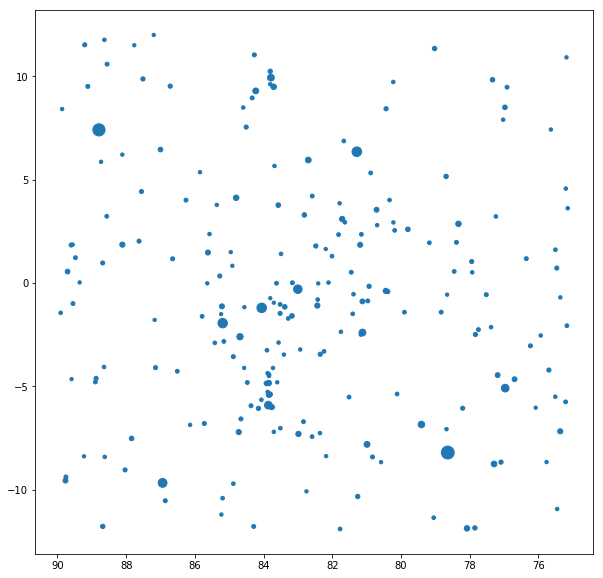

In [73]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.invert_xaxis()
ax.scatter(const[:,2],const[:,0],s=np.exp((13.-const[:,3])/2.51))

In [102]:
ra0, dec0 = 85/180.*np.pi,0
ra, dec, plx = const[:,2]/180.*np.pi, const[:,0]/180.*np.pi, const[:,1]
dst = 1./(1000.*plx)
flx = 0.5*np.exp((13.-const[:,3])/2.51)
x = np.cos(dec-dec0)*np.cos(ra-ra0)*dst
y = np.cos(dec-dec0)*np.sin(ra-ra0)*dst
z = np.sin(dec-dec0)*dst

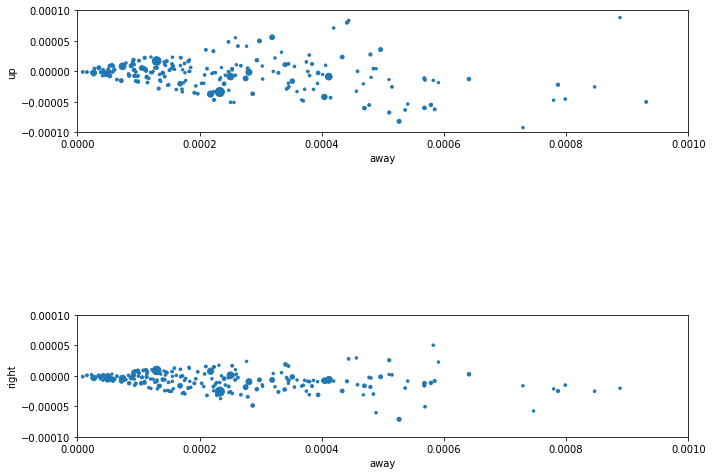

In [103]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax.set_xlim([0.0,0.001])
ax.set_ylim([-0.0001,0.0001])
ax.set_ylabel("up")
ax.set_xlabel("away")
ax.set_aspect("equal")
ax.scatter(x,z,s=flx);
    
    
ax = fig.add_subplot(212)
ax.set_xlim([0.0,0.001])
ax.set_ylim([-0.0001,0.0001])
ax.set_ylabel("right")
ax.set_aspect("equal")
ax.set_xlabel("away")
ax.scatter(x,y,s=flx);
fig.tight_layout()


    